In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import patches
import numpy as np
import scipy.stats as stats
from collections import Counter
from copy import deepcopy

PARENT_DIR = '/home/groups/dpwall/briannac/SARS-CoV-2_structural_variations/'
svs_table_file = PARENT_DIR + 'results/alignment/gisaid_seqs.svs_table_all.tsv'
start_ends_file = PARENT_DIR + 'results/transcriptome/read_ends.csv'
transcriptome_mat_file = PARENT_DIR + 'results/transcriptome/transcriptome_mat.svg'
transcriptome_mat_starts_file = PARENT_DIR + 'results/transcriptome/transcriptome_mat_starts.svg'
transcriptome_mat_ends_file = PARENT_DIR + 'results/transcriptome/transcriptome_mat_ends.svg'
transcriptome_starts_file = PARENT_DIR + 'results/transcriptome/transcriptome_starts.svg'
transcriptome_ends_file = PARENT_DIR + 'results/transcriptome/transcriptome_ends.svg'
fig_dir = PARENT_DIR + '/results/transcriptome/'

In [2]:
svs = pd.read_csv(svs_table_file)
df = pd.read_csv(start_ends_file)
df = df[df['ends']-df['starts']>20]

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  after removing the cwd from sys.path.


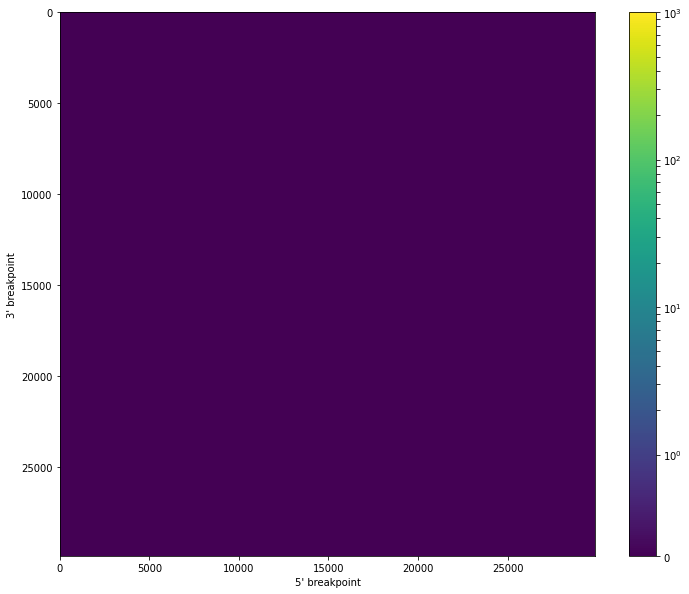

In [73]:
# Make heatmap
bins = 300
f,ax=plt.subplots(figsize=(12,10))
vals = plt.hist2d(data=df, x='starts', y='ends', bins=(300,300),norm=mpl.colors.SymLogNorm(linthresh=1,vmin=0,vmax=1000))
plt.colorbar()
plt.xlabel("5' breakpoint")
plt.ylabel("3' breakpoint")
plt.gca().invert_yaxis()
plt.savefig(fig_dir + 'transcriptome_mat.svg')#, dpi=500, transparent =True)
plt.savefig(fig_dir + 'transcriptome_mat.png', dpi=500, transparent =True)
plt.show()

In [4]:
starts=np.histogram(df['starts'], bins=np.linspace(.5,29903.5, bins))
stops=np.histogram(df['ends'], bins=np.linspace(.5,29903.5, bins))

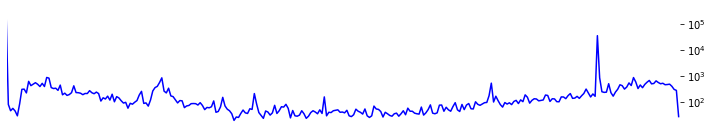

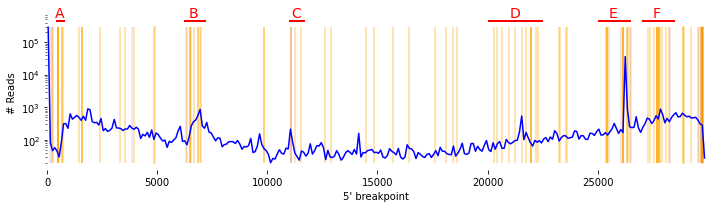

In [44]:
f,ax = plt.subplots(figsize=(10,2))
y_vals = (starts[0])
plt.plot((starts[1][1:]+starts[1][:-1])/2, y_vals, 'blue')
plt.xlim(100,29903)
plt.yscale('log')
plt.xticks([], [])
plt.xlabel("")
plt.ylabel("")
plt.minorticks_off()
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.tight_layout()
plt.box(False)
plt.savefig(transcriptome_mat_starts_file, dpi=500, transparent=True)
plt.show()

f,ax = plt.subplots(figsize=(10,3))
max_y = max(y_vals)
min_y=min(y_vals[~np.isinf(y_vals)])
for s in svs.iloc:
    if s['Structural Variant']=='D':    
        rect = patches.Rectangle(xy=(s['Start Pos'],min_y), width=1,height=max_y-min_y,linewidth=2,edgecolor='orange',facecolor='orange', alpha=.3)
        ax.add_patch(rect)
    if s['Structural Variant']=='I':   
        rect = patches.Rectangle(xy=(s['Start Pos'],min_y), width=1,height=max_y-min_y,linewidth=2,edgecolor='purple',facecolor='purple', alpha=.1)
        ax.add_patch(rect)
sv_regions = [('A', 400, 800), ('B',6200, 7200), ('C',11000, 11700), ('D',20000, 22500), ('E',25000, 26500), ('F',27000, 28500)] # For #(20179, 21751)
for label,start,stop in sv_regions:
    ax.hlines(y=1.5*max_y, xmin=start, xmax=stop, linewidth=2, color='r')
    plt.text((start+stop-500)/2,2*max_y,label, color='r', size=14)

ax.plot((starts[1][1:]+starts[1][:-1])/2,y_vals, 'blue')
ax.set_xlim(0,29903)
plt.yscale('log')
plt.xlabel("5' breakpoint")
plt.ylabel("# Reads")
plt.tight_layout()
plt.box(False)
plt.tight_layout()
plt.savefig(transcriptome_starts_file, dpi=500, transparent=True)
plt.show()

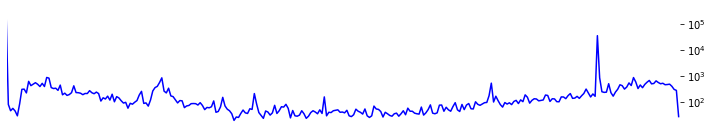

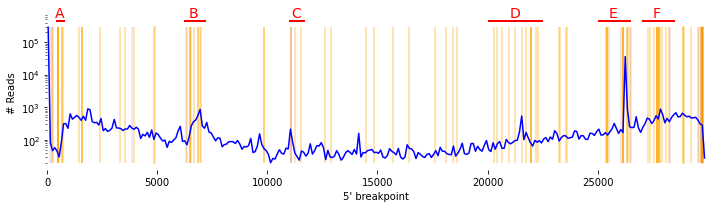

In [33]:
f,ax = plt.subplots(figsize=(10,2))
y_vals = (starts[0])
plt.plot((starts[1][1:]+starts[1][:-1])/2, y_vals, 'blue')
plt.xlim(100,29903)
plt.yscale('log')
plt.xticks([], [])
plt.xlabel("")
plt.ylabel("")
plt.minorticks_off()
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.tight_layout()
plt.box(False)
plt.savefig(transcriptome_mat_starts_file, dpi=500, transparent=True)
plt.show()

f,ax = plt.subplots(figsize=(10,3))
max_y = max(y_vals)
min_y=min(y_vals[~np.isinf(y_vals)])
for s in svs.iloc:
    if s['Structural Variant']=='D':    
        rect = patches.Rectangle(xy=(s['Start Pos'],min_y), width=1,height=max_y-min_y,linewidth=2,edgecolor='orange',facecolor='orange', alpha=.3)
        ax.add_patch(rect)
    if s['Structural Variant']=='I':   
        rect = patches.Rectangle(xy=(s['Start Pos'],min_y), width=1,height=max_y-min_y,linewidth=2,edgecolor='purple',facecolor='purple', alpha=.1)
        ax.add_patch(rect)
sv_regions = [('A', 400, 800), ('B',6200, 7200), ('C',11000, 11700), ('D',20000, 22500), ('E',25000, 26500), ('F',27000, 28500)] # For #(20179, 21751)
for label,start,stop in sv_regions:
    ax.hlines(y=1.5*max_y, xmin=start, xmax=stop, linewidth=2, color='r')
    plt.text((start+stop-500)/2,2*max_y,label, color='r', size=14)

ax.plot((starts[1][1:]+starts[1][:-1])/2,y_vals, 'blue')
ax.set_xlim(0,29903)
plt.yscale('log')
plt.xlabel("5' breakpoint")
plt.ylabel("# Reads")
plt.tight_layout()
plt.box(False)
plt.tight_layout()
plt.savefig(transcriptome_starts_file, dpi=500, transparent=True)
plt.show()

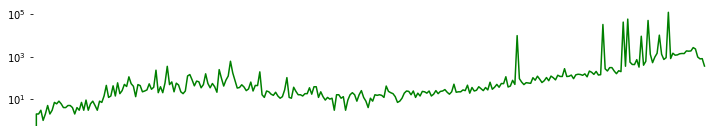

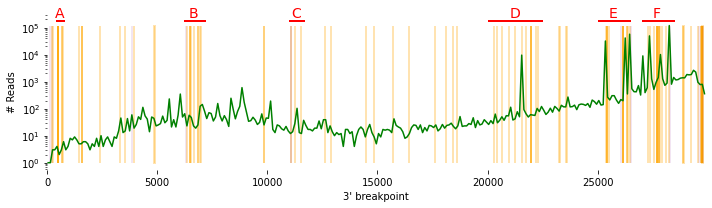

In [50]:
plt.figure(figsize=(10,2))
y_vals = (stops[0])
plt.plot((stops[1][1:]+stops[1][:-1])/2, y_vals, 'green')
plt.xlim(100,29903)
plt.yscale('log')
plt.xticks([], [])
plt.xlabel("")
plt.ylabel("")
plt.minorticks_off()
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.tight_layout()
plt.box(False)
plt.savefig(transcriptome_mat_ends_file, dpi=500, transparent=True)
plt.show()

f,ax = plt.subplots(figsize=(10,3))
max_y = max(y_vals)
min_y=min(y_vals[~np.isinf(y_vals)]+1)
for s in svs.iloc:
    if s['Structural Variant']=='D':    
        rect = patches.Rectangle(xy=(s['Start Pos'],min_y), width=1,height=max_y-min_y,linewidth=2,edgecolor='orange',facecolor='orange', alpha=.3)
        ax.add_patch(rect)
    if s['Structural Variant']=='I':   
        rect = patches.Rectangle(xy=(s['Start Pos'],min_y), width=1,height=max_y-min_y,linewidth=2,edgecolor='purple',facecolor='purple', alpha=.1)
        ax.add_patch(rect)
for label,start,stop in sv_regions:
    ax.hlines(y=1.5*max_y, xmin=start, xmax=stop, linewidth=2, color='r')
    plt.text((start+stop-500)/2,2*max_y,label, color='r', size=14)
ax.plot((stops[1][1:]+stops[1][:-1])/2,y_vals+1, 'green')
ax.set_xlim(0,29903)
plt.yscale('log')
plt.xlabel("3' breakpoint")
plt.ylabel("# Reads")
plt.tight_layout()
plt.box(False)
plt.tight_layout()
plt.savefig(transcriptome_ends_file)#, dpi=500, transparent=True)
plt.show()

In [49]:
min(y_vals)

0

# Significance

In [8]:
# Compute statistics on correlation between template-jumping points to SV locations.
svs = pd.read_csv(svs_table_file)
sv_locs = []
for i in range(len(svs)):
    sv_locs = sv_locs + [svs.iloc[i]['Start Pos']]
        
sv_counter = Counter(sv_locs)
sv_counts = [sv_counter[i] if i in sv_counter else 0 for i in range(1,29903)]


bins = 29903
start_counts=np.histogram(df['starts'], bins=np.linspace(.5,29903.5, bins))[0]
stop_counts=np.histogram(df['ends'], bins=np.linspace(.5,29903.5, bins))[0]

# Starts = 5', ends = 3'
print("5'")
print(stats.spearmanr(sv_counts, start_counts))
print(stats.pearsonr(sv_counts, np.log10(start_counts+1)))

print("3'")
print(stats.spearmanr(sv_counts, stop_counts))
print(stats.pearsonr(sv_counts, np.log10(stop_counts+1)))

5'
SpearmanrResult(correlation=0.023940040031913332, pvalue=3.470355175920616e-05)
(0.023295163639505744, 5.610443142383448e-05)
3'
SpearmanrResult(correlation=0.03139199679622998, pvalue=5.651965178436406e-08)
(0.04457078725389321, 1.2505415682859003e-14)
